## Nessa primeira parte, eu executo algumas análises básicas a partir dos dados financeiros da empresa.

### Análise com preços das ações; análise com resultados de exercícios do últimos anos e uma análise do endividamento

### Carrego as bibliotecas que utilizarei:

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import datetime as dt

In [21]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

### Baixar os dados de preços das ações da WEG:

In [22]:
def dados_preçosweg():
    # Definir o intervalo de datas: de 01/01/2019 até 06/09/2024.
    start = dt.datetime(2017, 1, 1)
    end = dt.datetime(2024, 9, 6 )

    # Lista de tickers das empresas
    tickers = ['WEGE3.SA']

    # Criar um DataFrame vazio para armazenar os dados
    df = pd.DataFrame()

    # Baixar os dados de fechamento da empresa e armazenar no DataFrame df
    for ticker in tickers:
        try:
            data = yf.download(ticker, start=start, end=end)['Close']
            # Renomear a coluna do DataFrame para incluir o ticker
            df[ticker.split('.')[0]] = data
        except Exception as e:
            print(f"Erro ao baixar dados para {ticker}: {e}")

    # Resetar o índice para incluir a coluna de datas no DataFrame
    df.reset_index(inplace=True)

    return df

In [23]:
# Obter os dados
df = dados_preçosweg()

[*********************100%***********************]  1 of 1 completed


### Colocar os dados de preços em um dataframe e plotá-los em um gráfico de linhas e com uma linha de tendência:

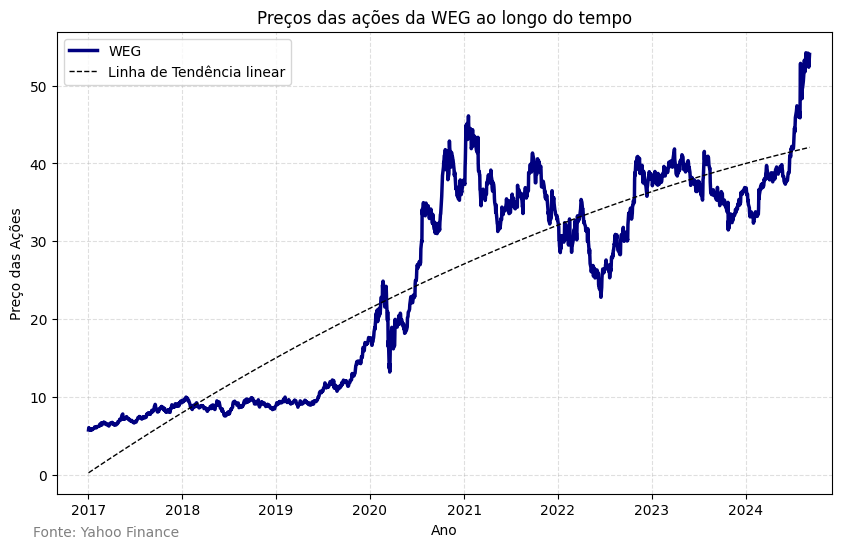

In [24]:
# Criar uma coluna de data a partir da coluna 'Date'
df['data'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('data', inplace=True)

# Criar uma figura
plt.figure(figsize=(10, 6))

# Plotar os dados sobre os preços das ações da WEG
plt.plot(df.index, df['WEGE3'], label='WEG', color='navy', linewidth=2.5)

# Adicionar linha de tendência
df['Date_numeric'] = df.index.astype('int64') // 10**9
coeficientes = np.polyfit(df['Date_numeric'], df['WEGE3'], 2)
tendencia = np.poly1d(coeficientes)
plt.plot(df.index, tendencia(df['Date_numeric']), label='Linha de Tendência linear', color='black', linestyle='--', linewidth=1)

# Nomear os eixos do gráfico
plt.xlabel('Ano')
plt.ylabel('Preço das Ações')

# Entitular o gráfico
plt.title('Preços das ações da WEG ao longo do tempo')

# Mostrar a legenda no gráfico
plt.legend()

# Mostrar as grades no gráfico
plt.grid(True, linestyle = '--', alpha = 0.4)

# Configurar o limite do eixo x
plt.xlim(pd.Timestamp('2016-09-01'), pd.Timestamp('2024-12-01'))

# Adicionar um texto dizendo a fonte dos dados
plt.text(pd.Timestamp('2016-06-01'), -7.8, 'Fonte: Yahoo Finance', fontsize=10, color='gray', horizontalalignment='left')

# Mostrar o gráfico
plt.show()

## Gráfico interativo

In [25]:
fig0 = px.line(df,
               x=df.index,
               y='WEGE3',
               title='Preços das ações da WEG ao longo do tempo',
               labels={'Date': 'Data', 'WEGE3': 'Preços'},
               template='plotly_white',
               width=800,
               height=500,
               line_shape='linear')

# Cor da linha e preenchimento do gráfico com cor
fig0.update_traces(line_color='navy', fill='tozeroy')

# Configurar o fundo do gráfico como branco
fig0.update_layout(plot_bgcolor='white')
# Mostrar o gráfico
fig0.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [27]:
#calcular estatísiticas descritivas dos preços das ações
df['WEGE3'].describe()

,WEGE3
count,1914.000000
mean,24.533211
std,13.503162
min,5.757692
25%,9.312403
50%,28.809999
75%,36.615002
max,54.200001


## Distribuição de preços no período considerado:

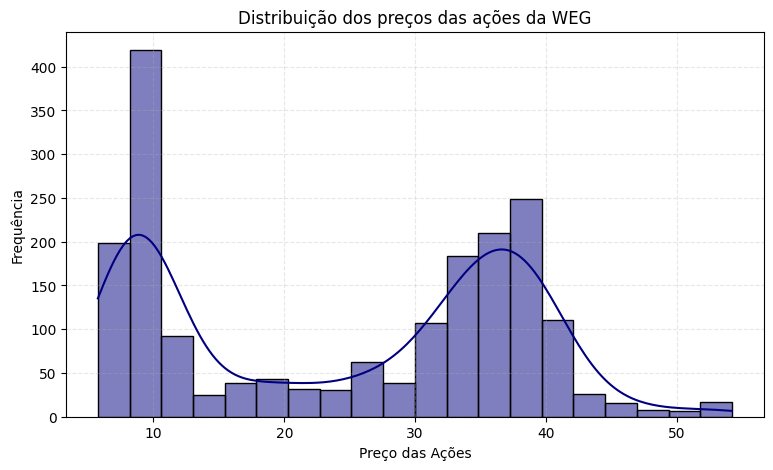

In [7]:
#vou criar uma distribuição com seaborn
plt.figure(figsize=(9, 5))
sns.histplot(df['WEGE3'], bins=20, kde=True, color='navy')

# Nomear os eixos do gráfico
plt.xlabel('Preço das Ações')
plt.ylabel('Frequência')

#mostrar grades
plt.grid(True, alpha = 0.3, linestyle = '--')

# Título do gráfico
plt.title('Distribuição dos preços das ações da WEG')

# Mostrar o gráfico
plt.show()

## Distribuição dos preços até 2019


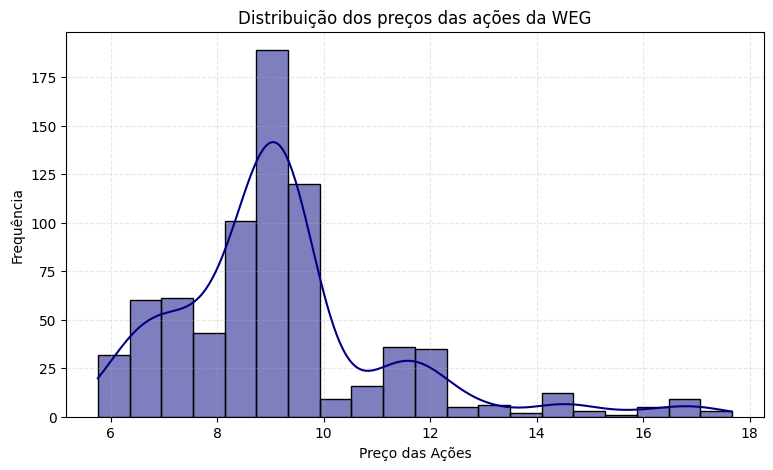

In [8]:
# vou colocar um gráfico de distribuição até 2019
plt.figure(figsize=(9, 5))
sns.histplot(df['WEGE3'][df.index.year <= 2019], bins=20, kde=True, color='navy')

# Nomear os eixos do gráfico
plt.xlabel('Preço das Ações')
plt.ylabel('Frequência')

#mostrar grades
plt.grid(True, alpha = 0.3, linestyle = '--')

# Título do gráfico
plt.title('Distribuição dos preços das ações da WEG')

# Mostrar o gráfico
plt.show()

## Distribuição dos preços após 2019 até agora

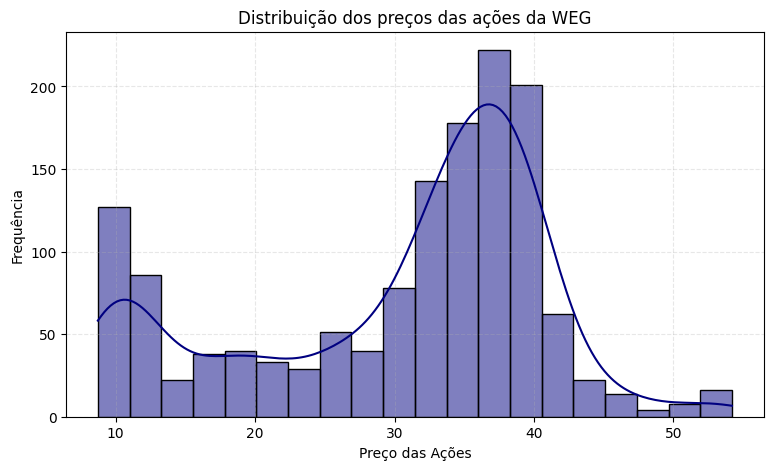

In [9]:
#vou colocar um gráfico de distribuição a partir do ano de 2019
plt.figure(figsize=(9, 5))
sns.histplot(df['WEGE3'][df.index.year >= 2019], bins=20, kde=True, color='navy')

# Nomear os eixos do gráfico
plt.xlabel('Preço das Ações')
plt.ylabel('Frequência')

#mostrar grades
plt.grid(True, alpha = 0.3, linestyle = '--')

# Título do gráfico
plt.title('Distribuição dos preços das ações da WEG')

# Mostrar o gráfico
plt.show()

## O patamar de preços mais comuns subiu muito no período

## Vou criar um box-plot para o período até 2019 e um outro para o período entre 2019 e 2024:

In [50]:
# Criar uma cópia do DataFrame
df_aç = df.copy()

# Criar uma nova coluna para indicar o período
df_aç['Periodo'] = pd.cut(df['Date'],
                        bins=[pd.to_datetime('2017-01-01'), pd.to_datetime('2020-01-01'), pd.to_datetime('2024-01-01')],
                        labels=['2017-2020', '2020-2024'])

# Renomear a coluna de preços para 'Preco'
df_aç.rename(columns={'WEGE3': 'Preco'}, inplace=True)

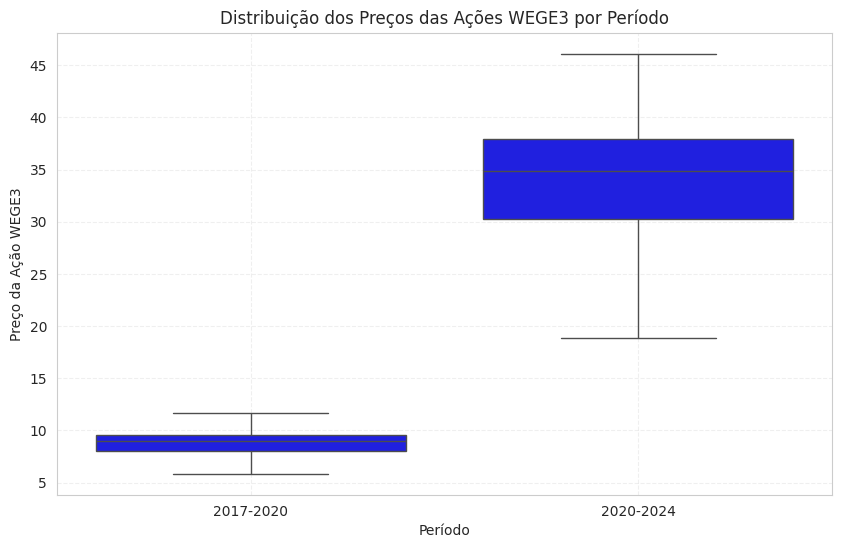

In [102]:
# Criando o box-plot
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.boxplot(x='Periodo', y='Preco', data=df_aç, color='blue', showfliers=False)
plt.title('Distribuição dos Preços das Ações WEGE3 por Período')
plt.xlabel('Período')
plt.ylabel('Preço da Ação WEGE3')
plt.grid(True, alpha = 0.3, linestyle = '--')
plt.show()

## Interpretando o Box-Plot:

### O boxplot mostra que houve um aumento nos preços das ações WEGE3 no período de 2020-2024 em comparação com o período 2017-2020. Além disso, a maior dispersão dos dados no período mais recente sugere uma maior volatilidade nos preços durante esse período.

## A seguir vamos constatar essa indicação a partida visualização da volatilidade de preços.

## Veja:

## Calcular e visualizar a média móvel e a volatilidade das ações:

### Calculando a média móvel

In [10]:
# Gráfico da média móvel do valor das ações ao longo do tempo
df['med_movel'] = df['WEGE3'].rolling(window=60).mean()

### Visualizando isso em um gráfico:

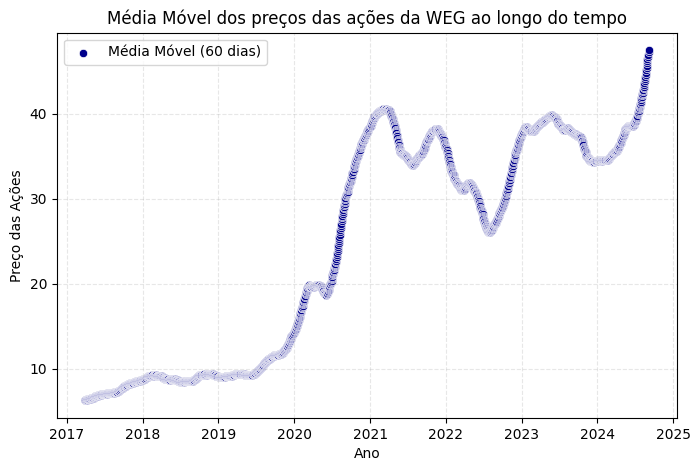

In [11]:
#vou colocar a média móvel em um gráfico de dispersão
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Date', y='med_movel', label='Média Móvel (60 dias)', color='darkblue')
plt.xlabel('Ano')
plt.ylabel('Preço das Ações')
plt.title('Média Móvel dos preços das ações da WEG ao longo do tempo')
plt.legend()
plt.grid(True, alpha = 0.3, linestyle = '--')
plt.show()

### Calculando a volatilidade:

In [12]:
df['Volatility'] = df['WEGE3'].rolling(window=50).std()

### Visualizando isso:

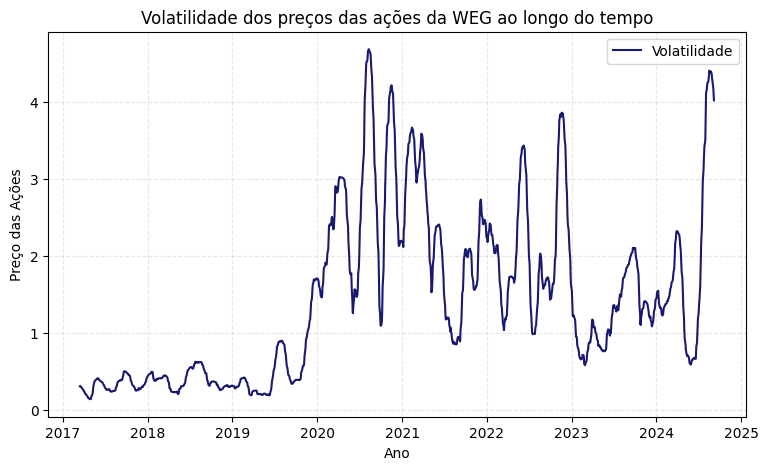

In [13]:
#vou colocar a volatilidade em um gráfico
plt.figure(figsize=(9, 5))
sns.lineplot(data=df, x='Date', y='Volatility', label='Volatilidade', color='midnightblue')

# Nomear os eixos do gráfico
plt.xlabel('Ano')
plt.ylabel('Preço das Ações')
plt.title('Volatilidade dos preços das ações da WEG ao longo do tempo')
plt.legend()
plt.grid(True, alpha = 0.3, linestyle = '--')
plt.show()

## Veja como a volatilidade era baixíssima até a pandemia. Agora ela parece querer começar a se estabilizar como era antes, mas deu um salto recentemente. Isso demonstra como o mercado continua volátil e como isso se intensificou desde a pandemia e ainda não voltou ao normal.



---



## Análise com dados das demonstrações de resultados de exercício:

### Obter os dados da DRE

In [53]:
def DRE():
    # Lista de tickers das empresas
    tickers = ['WEGE3.SA']
    df1 = []

    # Loop para baixar a Demonstração de Resultados Anual da empresa
    for ticker in tickers:
        ativo = yf.Ticker(ticker)
        dre_anual = ativo.financials

        # Filtrar os dados anuais a partir de 2019
        dre_anual_filtered = dre_anual.loc[:, dre_anual.columns >= '2019-01-01']

        df1.append(dre_anual_filtered.T)

    # Concatenar as Demonstrações de Resultados Anuais em um único dataframe
    resultado = pd.concat(df1)
    resultado.reset_index(inplace=True)
    resultado.rename(columns={'index': 'Ano'}, inplace=True)

    return resultado

### Exibir os dados obtidos:

In [54]:
# Chamar a função DRE e exibir o resultado
dre_resultado = DRE()
dre_resultado.head()

,Ano,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,...,Operating Income,Operating Expense,Other Operating Expenses,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
0,2023-12-31,72283524.0,0.1097,6709981000.0,658920000.0,658920000.0,5731670000.0,628042000.0,21702737000.0,7368901000.0,...,6394022000.0,4406842000.0,322663000.0,3453408000.0,2408520000.0,1044888000.0,10800864000.0,21702737000.0,32503601000.0,32503601000.0
1,2022-12-31,40135578.3,0.1647,5515876000.0,243689000.0,243689000.0,4208084000.0,565557000.0,21209235000.0,5759565000.0,...,4951697000.0,3743790000.0,198729000.0,3046209000.0,2173274000.0,872935000.0,8695487000.0,21209235000.0,29904722000.0,29904722000.0
2,2021-12-31,8535132.7,0.1553,4847224000.0,54959000.0,54959000.0,3585947000.0,520178000.0,16602381000.0,4902183000.0,...,4228395000.0,2732562000.0,-269001000.0,2609211000.0,1833204000.0,776007000.0,6960957000.0,16602381000.0,23563338000.0,23563338000.0
3,2020-12-31,14693545.1,0.1277,3159789000.0,115063000.0,115063000.0,2340873000.0,451359000.0,12032050000.0,3274852000.0,...,2869449000.0,2568058000.0,91312000.0,2161286000.0,1506817000.0,654469000.0,5437507000.0,12032050000.0,17469557000.0,17469557000.0


In [55]:
#colocar o dre_resultado indo de 2020 até 2023
dre_resultado = dre_resultado.iloc[::-1]
dre_resultado

,Ano,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,...,Operating Income,Operating Expense,Other Operating Expenses,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
3,2020-12-31,14693545.1,0.1277,3159789000.0,115063000.0,115063000.0,2340873000.0,451359000.0,12032050000.0,3274852000.0,...,2869449000.0,2568058000.0,91312000.0,2161286000.0,1506817000.0,654469000.0,5437507000.0,12032050000.0,17469557000.0,17469557000.0
2,2021-12-31,8535132.7,0.1553,4847224000.0,54959000.0,54959000.0,3585947000.0,520178000.0,16602381000.0,4902183000.0,...,4228395000.0,2732562000.0,-269001000.0,2609211000.0,1833204000.0,776007000.0,6960957000.0,16602381000.0,23563338000.0,23563338000.0
1,2022-12-31,40135578.3,0.1647,5515876000.0,243689000.0,243689000.0,4208084000.0,565557000.0,21209235000.0,5759565000.0,...,4951697000.0,3743790000.0,198729000.0,3046209000.0,2173274000.0,872935000.0,8695487000.0,21209235000.0,29904722000.0,29904722000.0
0,2023-12-31,72283524.0,0.1097,6709981000.0,658920000.0,658920000.0,5731670000.0,628042000.0,21702737000.0,7368901000.0,...,6394022000.0,4406842000.0,322663000.0,3453408000.0,2408520000.0,1044888000.0,10800864000.0,21702737000.0,32503601000.0,32503601000.0


In [56]:
# Verificar os nomes das colunas ds dados obtidos e colocados no dataframe:
print(dre_resultado.columns)

Index(['Ano', 'Tax Effect Of Unusual Items', 'Tax Rate For Calcs',
       'Normalized EBITDA', 'Total Unusual Items',
       'Total Unusual Items Excluding Goodwill',
       'Net Income From Continuing Operation Net Minority Interest',
       'Reconciled Depreciation', 'Reconciled Cost Of Revenue', 'EBITDA',
       'EBIT', 'Net Interest Income', 'Interest Expense', 'Interest Income',
       'Normalized Income',
       'Net Income From Continuing And Discontinued Operation',
       'Total Expenses', 'Diluted Average Shares', 'Basic Average Shares',
       'Diluted EPS', 'Basic EPS', 'Diluted NI Availto Com Stockholders',
       'Net Income Common Stockholders', 'Otherunder Preferred Stock Dividend',
       'Net Income', 'Minority Interests',
       'Net Income Including Noncontrolling Interests',
       'Net Income Continuous Operations', 'Tax Provision', 'Pretax Income',
       'Special Income Charges', 'Restructuring And Mergern Acquisition',
       'Net Non Operating Interest Income 

### Vou plotar agora em um gráfico de barras

In [57]:
#Renomeando os nomes das colunas para Receita Total e Lucro Líquido:
dre_resultado.rename(columns={'Total Revenue': 'Receita Total', 'Net Income': 'Lucro Líquido'}, inplace=True)

#Reconfigurando as datas para mostrar apenas os anos:
dre_resultado['Ano'] = pd.to_datetime(dre_resultado['Ano']).dt.year

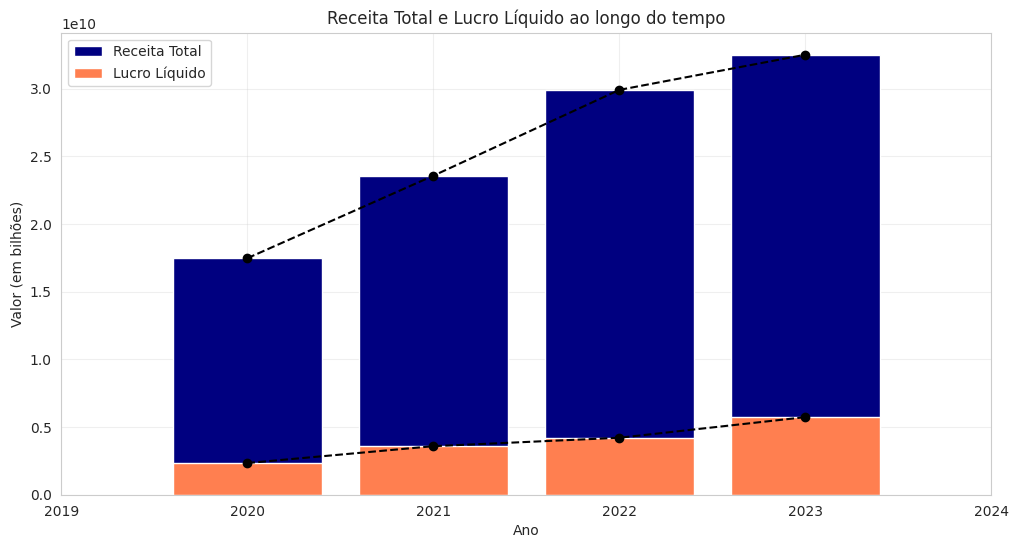

In [58]:
# Criar uma figura:
plt.figure(figsize=(12, 6))

# Plotar os gráficos:
plt.bar(dre_resultado['Ano'], dre_resultado['Receita Total'], label='Receita Total', color='navy')
plt.scatter(dre_resultado['Ano'], dre_resultado['Receita Total'], color='black')
plt.plot(dre_resultado['Ano'], dre_resultado['Receita Total'], color='black', linestyle = '--')

plt.bar(dre_resultado['Ano'], dre_resultado['Lucro Líquido'], label='Lucro Líquido', color='coral')
plt.scatter(dre_resultado['Ano'], dre_resultado['Lucro Líquido'], color='black')
plt.plot(dre_resultado['Ano'], dre_resultado['Lucro Líquido'], color='black', linestyle = '--')

# Nomear os eixos do gráfico
plt.xlabel('Ano')
plt.ylabel('Valor (em bilhões)')
plt.title('Receita Total e Lucro Líquido ao longo do tempo')

plt.xlim(2019, 2024)

# Mostrar a legenda no gráfico
plt.legend()

# Mostrar as grades no gráfico
plt.grid(True, alpha=0.3)
plt.show()

## Veja como as receitas crescem ano após ano de maneira consistente.

## Vamos ver isso com algum detalhe a mais:

In [59]:
#calcular o crescimento ano a ano das receitas e armazenar isso em um outro dataframe, receitas
receitas = dre_resultado[['Ano', 'Receita Total']].copy()

receitas.head()

,Ano,Receita Total
3,2020,17469557000.0
2,2021,23563338000.0
1,2022,29904722000.0
0,2023,32503601000.0


In [60]:
## agora vou calcular o crescimento de 2020 em relação 2021, 2021 em relação a 2022 e etc
receitas['Crescimento%'] = receitas['Receita Total'].pct_change() * 100
receitas.head()

,Ano,Receita Total,Crescimento%
3,2020,17469557000.0,NaN
2,2021,23563338000.0,34.882287
1,2022,29904722000.0,26.912078
0,2023,32503601000.0,8.690531


In [61]:
import matplotlib.ticker as ticker

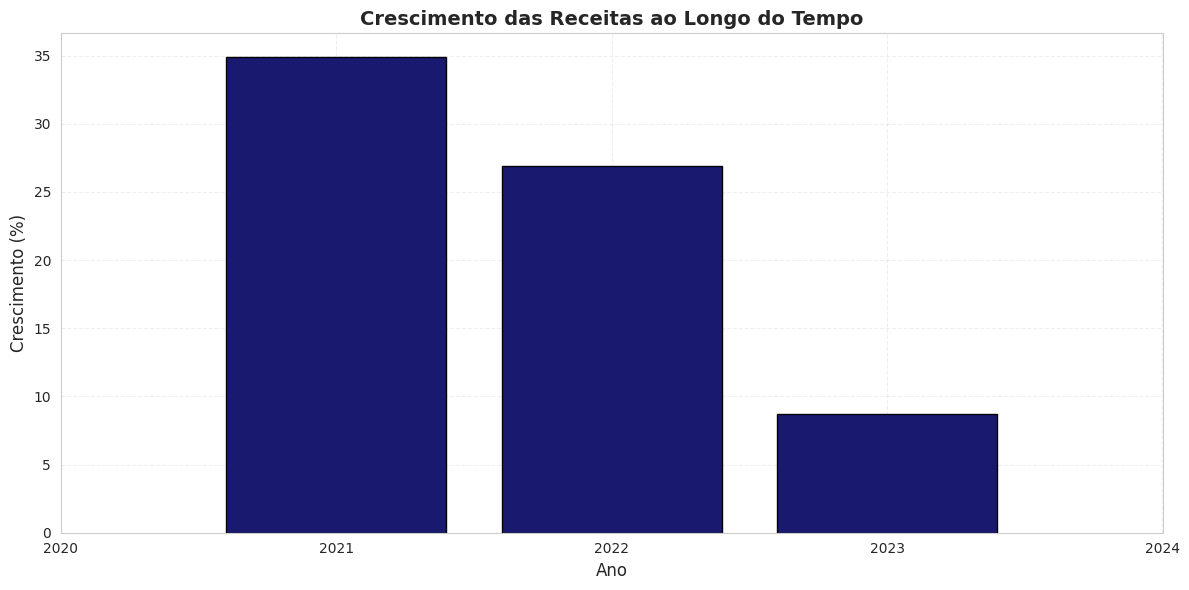

In [88]:
# Visualizar o crescimento% em um gráfico
plt.figure(figsize=(12, 6))

# Usar uma cor única e sólida
plt.bar(receitas['Ano'], receitas['Crescimento%'], color='midnightblue', edgecolor='black')

# Ajustar rótulos e título
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Crescimento (%)', fontsize=12)
plt.title('Crescimento das Receitas ao Longo do Tempo', fontsize=14, fontweight='bold')

# Melhorar a visualização do grid
plt.grid(True, alpha=0.3, linestyle='--')

# Definir o eixo x para mostrar apenas anos inteiros
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))  # Mostrar apenas anos inteiros
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: int(x)))  # Remover os decimais

# Limitar os valores do eixo x
plt.xlim(2020, 2024)

# Melhorar a visualização do eixo x
plt.xticks(fontsize=10)


plt.tight_layout()
plt.show()


## Veja como houve crescimento das receitas ano após ano, mesmo na época da pandemia. Na verdade, entre 2020 e 2021 houve um crescimento de quase 35% das receitas!

## No último o crescimento desacelerou e foi de menos 10%.

In [63]:
#vou escrever o Cost Of Revenue
print(dre_resultado[['Ano', 'Cost Of Revenue']])

    Ano Cost Of Revenue
3  2020   12032050000.0
2  2021   16602381000.0
1  2022   21209235000.0
0  2023   21702737000.0


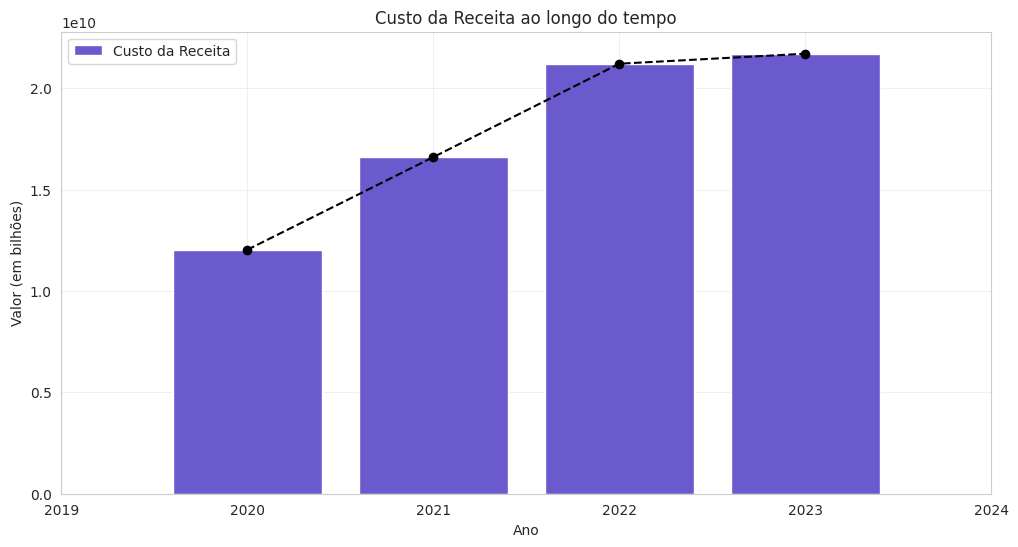

In [85]:
#quero visualizar a evolução dos custos da receita (cost revenue)
plt.figure(figsize=(12, 6))

# Plotar os gráficos:
plt.bar(dre_resultado['Ano'], dre_resultado['Cost Of Revenue'], label='Custo da Receita', color='slateblue')
plt.scatter(dre_resultado['Ano'], dre_resultado['Cost Of Revenue'], color='black')
plt.plot(dre_resultado['Ano'], dre_resultado['Cost Of Revenue'], color='black', linestyle = '--')

# Nomear os eixos do gráfico
plt.xlabel('Ano')
plt.ylabel('Valor (em bilhões)')
plt.title('Custo da Receita ao longo do tempo')

plt.xlim(2019, 2024)

# Mostrar a legenda no gráfico
plt.legend()

# Mostrar as grades no gráfico
plt.grid(True, alpha=0.3)
plt.show()


## Veja o crescimento acelerado do custo da receita entre 2020 e 2022, seguida de uma possível estabilização entre 2022 e 2023. Note que o crescimento dos custos acompanham a quantidade de receita gerada, que nos anos de maior crescimento o custo dela aumenta.

## O correto é verificar o custo por unidade de receita gerada.

In [75]:
df_receitas = dre_resultado[['Ano', 'Receita Total', 'Cost Of Revenue']].copy()
df_receitas.head()

,Ano,Receita Total,Cost Of Revenue
3,2020,17469557000.0,12032050000.0
2,2021,23563338000.0,16602381000.0
1,2022,29904722000.0,21209235000.0
0,2023,32503601000.0,21702737000.0


In [76]:
#vou calcular a variação da receita total e do cost of revenue
df_receitas['Variacao_Receita'] = df_receitas['Receita Total'].pct_change()
df_receitas['Variacao_Custo'] = df_receitas['Cost Of Revenue'].pct_change()

## Veja a correlação entre os dois

In [68]:
#calcular a correlação entre Varaicao_Receita e Variacao_Custo
df_receitas['Variacao_Receita'].corr(df_receitas['Variacao_Custo'])

0.9998224884035429

## A correlação é de 99%. Então veja que o nível de crescimento da receita acompanhou o nível de crescimento dos custos da receita. No caso, os custos de receita aumentaram o que fez com que o nível de receita total tenha diminuído.

In [77]:
#calcular o custo de receita por unidade de receita
df_receitas['Custo por Unidade de Receita'] = dre_resultado['Cost Of Revenue'] / dre_resultado['Receita Total']
df_receitas['Custo por Unidade de Receita']

,Custo por Unidade de Receita
3,0.688744
2,0.704585
1,0.709227
0,0.667703


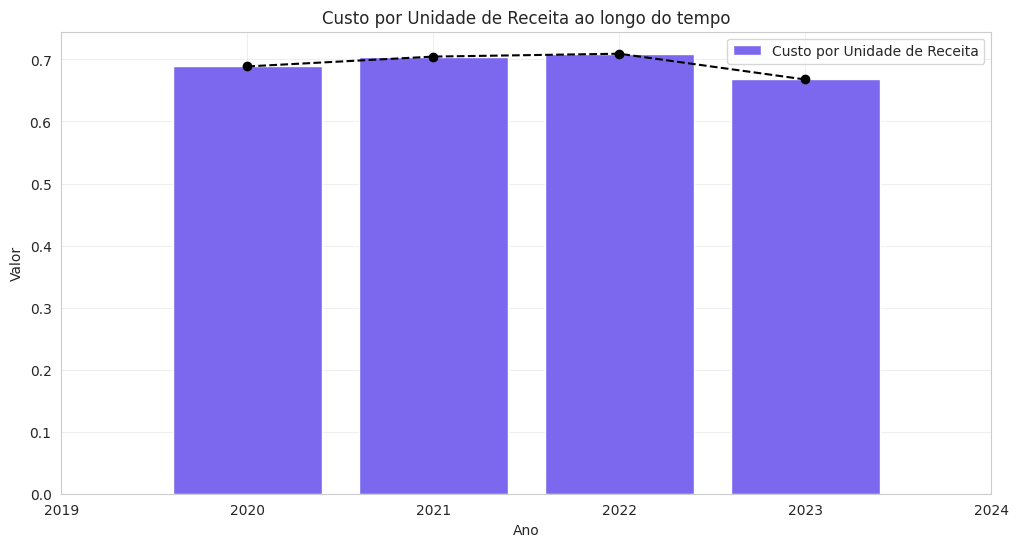

In [89]:
#visualizar isso em um gráfico. colocar Ano e Custo por Unidade de receita num gráfico
plt.figure(figsize=(12, 6))

# Plotar os gráficos:
plt.bar(dre_resultado['Ano'], df_receitas['Custo por Unidade de Receita'], label='Custo por Unidade de Receita', color='mediumslateblue')
plt.scatter(dre_resultado['Ano'], df_receitas['Custo por Unidade de Receita'], color='black')
plt.plot(dre_resultado['Ano'], df_receitas['Custo por Unidade de Receita'], color='black', linestyle = '--')

# Nomear os eixos do gráfico
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.title('Custo por Unidade de Receita ao longo do tempo')

plt.xlim(2019, 2024)

# Mostrar a legenda no gráfico
plt.legend()

# Mostrar as grades no gráfico
plt.grid(True, alpha=0.3)
plt.show()


## Veja que está muito estável. Tendo tido uma queda um pouco (pouco mesmo) maior no último ano.

## Perceba que, com isso, a margem de lucro da empresa tem continuado crescendo.

### Veja só:

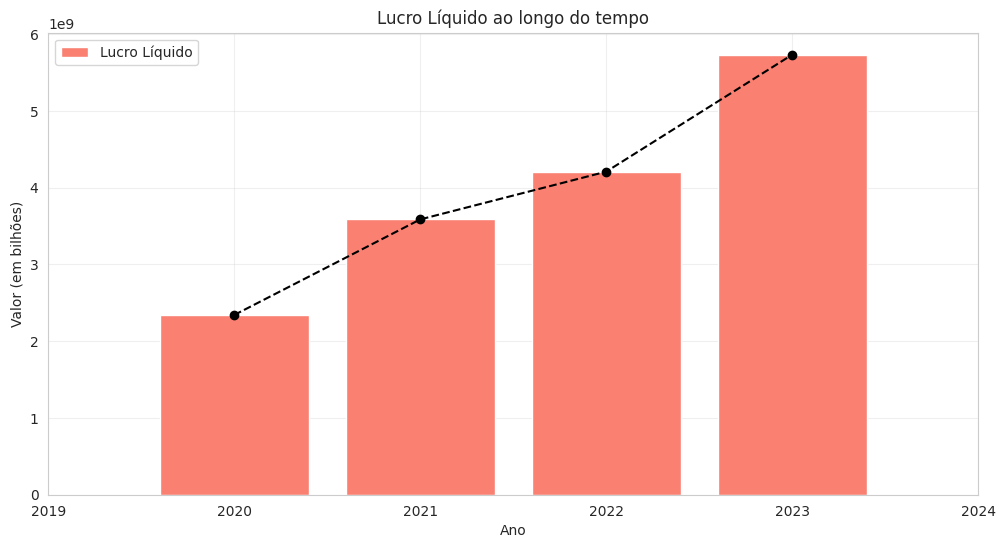

In [81]:
#vou colocar um gráfico de barras com seaborn do crescimento do lucro líquido
plt.figure(figsize=(12, 6))

# Plotar os gráficos:
plt.bar(dre_resultado['Ano'], dre_resultado['Lucro Líquido'], label='Lucro Líquido', color='salmon')
plt.scatter(dre_resultado['Ano'], dre_resultado['Lucro Líquido'], color='black')
plt.plot(dre_resultado['Ano'], dre_resultado['Lucro Líquido'], color='black', linestyle = '--')

# Nomear os eixos do gráfico
plt.xlabel('Ano')
plt.ylabel('Valor (em bilhões)')
plt.title('Lucro Líquido ao longo do tempo')

plt.xlim(2019, 2024)

# Mostrar a legenda no gráfico
plt.legend()

# Mostrar as grades no gráfico
plt.grid(True, alpha=0.3)
plt.show()

## Note que o lucro líquido aumentou muito de 2022 para 2023.

In [84]:
#calculando o crescimento do lucro líquido da empresa e colocando num dataframe lucro_liquio
lucro_liquido = dre_resultado[['Ano', 'Lucro Líquido']].copy()

#calculando a variacao_lucro
lucro_liquido['Variacao%_Lucro'] = lucro_liquido['Lucro Líquido'].pct_change() * 100

#visualizar o lucro_liquido
lucro_liquido.head()

,Ano,Lucro Líquido,Variacao%_Lucro
3,2020,2340873000.0,NaN
2,2021,3585947000.0,53.188447
1,2022,4208084000.0,17.349308
0,2023,5731670000.0,36.206169


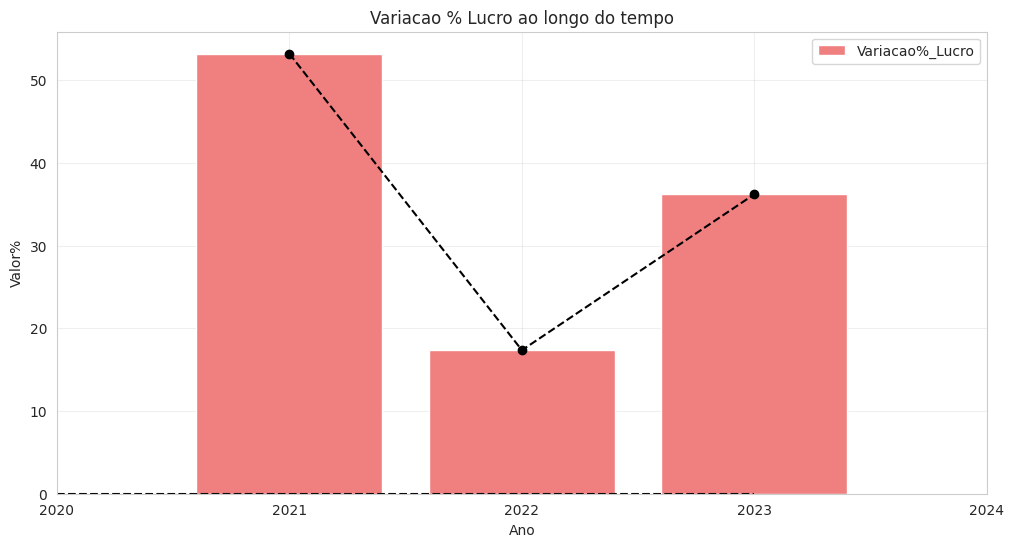

In [99]:
#vou colocar o gráfico de Variacao%_Lucro por Ano
plt.figure(figsize=(12, 6))

# Plotar os gráficos:
plt.bar(lucro_liquido['Ano'], lucro_liquido['Variacao%_Lucro'], label='Variacao%_Lucro', color='lightcoral')
plt.scatter(lucro_liquido['Ano'], lucro_liquido['Variacao%_Lucro'], color='black')
plt.plot(lucro_liquido['Ano'], lucro_liquido['Variacao%_Lucro'], color='black', linestyle = '--')
plt.plot(lucro_liquido['Ano'], [0] * len(lucro_liquido), color='black', linestyle='--')

# Nomear os eixos do gráfico
plt.xlabel('Ano')
plt.ylabel('Valor%')
plt.title('Variacao % Lucro ao longo do tempo')

plt.xlim(2020, 2024)
# Definir o eixo x para mostrar apenas anos inteiros
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))  # Mostrar apenas anos inteiros
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: int(x)))  # Remover os decimais

# Mostrar a legenda no gráfico
plt.legend()

# Mostrar as grades no gráfico
plt.grid(True, alpha=0.3)

plt.show()

## É uma empresa que surpreende ano a ano.

In [121]:
def BP():
    tickers = ["WEGE3.SA"]

    # Crio uma lista vazia que vou utilizar logo mais
    balance_sheets = []

    # Loop para baixar os balanços patrimoniais de cada empresa
    for ticker in tickers:
        try:
            ativo = yf.Ticker(ticker)
            # Baixar o balanço patrimonial anual
            balanco = ativo.balance_sheet
            balanco['Company'] = ticker.split('.')[0]
            balance_sheets.append(balanco)
        except Exception as e:
            print(f"Erro ao baixar dados para o ativo {ticker}: {e}")

    # Concatenar os balanços patrimoniais em um único dataframe
    balanco_patrimonial = pd.concat(balance_sheets)
    balanco_patrimonial = balanco_patrimonial.T  # Transpor para facilitar a visualização
    balanco_patrimonial.reset_index(inplace=True)
    balanco_patrimonial.rename(columns={'index': 'Ano'}, inplace=True)

    return balanco_patrimonial

In [122]:
# Obter os dados
df_balanco = BP()
df_balanco.head()

,Ano,Treasury Shares Number,Ordinary Shares Number,Share Issued,Net Debt,Total Debt,Tangible Book Value,Invested Capital,Working Capital,Net Tangible Assets,...,Raw Materials,Taxes Receivable,Accounts Receivable,Allowance For Doubtful Accounts Receivable,Gross Accounts Receivable,Cash Cash Equivalents And Short Term Investments,Other Short Term Investments,Cash And Cash Equivalents,Cash Equivalents,Cash Financial
0,2023-12-31 00:00:00,2083696.0,4195234302.0,4197317998.0,NaN,3391960000.0,15870840000.0,20177146000.0,10342622000.0,15870840000.0,...,2300144000.0,541102000.0,6070556000.0,-56987000.0,6127543000.0,7081224000.0,592770000.0,6488454000.0,5179673000.0,1308781000.0
1,2022-12-31 00:00:00,1302592.0,4196015406.0,4197317998.0,NaN,4009322000.0,13310780000.0,18294487000.0,9390333000.0,13310780000.0,...,2694394000.0,657580000.0,5614423000.0,-40017000.0,5654440000.0,4982828000.0,531826000.0,4451002000.0,3740097000.0,710905000.0
2,2021-12-31 00:00:00,1306348.0,4196011650.0,4197317998.0,NaN,2111628000.0,12054583000.0,15394086000.0,8018062000.0,12054583000.0,...,2103367000.0,890290000.0,4317393000.0,-48766000.0,4366159000.0,3217135000.0,502708000.0,2714427000.0,2184605000.0,529822000.0
3,2020-12-31 00:00:00,1837896.0,4195480102.0,4197317998.0,NaN,1974106000.0,9967690000.0,13249745000.0,6674099000.0,9967690000.0,...,1081626000.0,339283000.0,3417251000.0,-61582000.0,3478833000.0,4484934000.0,592794000.0,3892140000.0,3307808000.0,584332000.0
4,2019-12-31 00:00:00,NaN,NaN,NaN,338925000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
# Armazenar as colunas 'Ano' e 'Total Debt' em um novo DataFrame
df_debt = df_balanco[['Ano', 'Total Debt']].copy()

In [131]:
df_debt

,Ano,Total Debt
0,2023-12-31 00:00:00,3391960000.0
1,2022-12-31 00:00:00,4009322000.0
2,2021-12-31 00:00:00,2111628000.0
3,2020-12-31 00:00:00,1974106000.0
4,2019-12-31 00:00:00,NaN
5,Company,WEGE3


In [133]:
# Removendo a linha que contém 'Company' na coluna 'Ano'
df_debt = df_debt[df_debt['Ano'] != 'Company']

# Convertendo 'Ano' para datetime
df_debt['Ano'] = pd.to_datetime(df_debt['Ano'])

# Formatando 'Ano' para o formato desejado
df_debt['Ano'] = df_debt['Ano'].dt.strftime('%Y-%m-%d')

# Removendo linhas com valores NaN
df_debt = df_debt.dropna()

<ipython-input-133-dafc781e76f9>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-133-dafc781e76f9>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## veja como ficou o dataframe:

In [134]:
df_debt

,Ano,Total Debt
0,2023-12-31,3391960000.0
1,2022-12-31,4009322000.0
2,2021-12-31,2111628000.0
3,2020-12-31,1974106000.0


In [137]:
#colocar o dre_debt indo de 2020 até 2023
df_debt = df_debt.iloc[::-1]
df_debt

,Ano,Total Debt
3,2020-12-31,1974106000.0
2,2021-12-31,2111628000.0
1,2022-12-31,4009322000.0
0,2023-12-31,3391960000.0


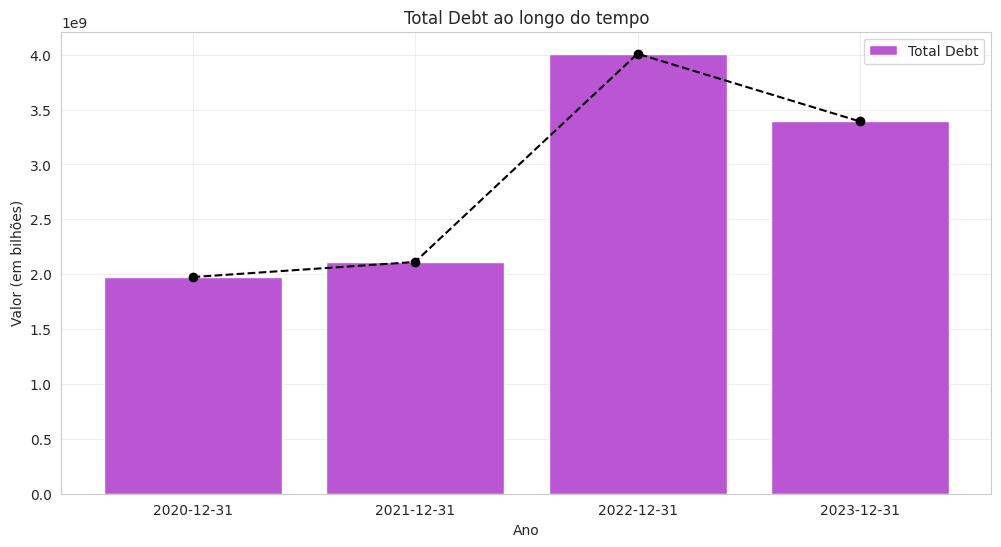

In [143]:
# Criar o gráfico
plt.figure(figsize=(12, 6))

# Plotar o gráfico de barras e adicionar uma linha com marcadores
plt.bar(df_debt['Ano'], df_debt['Total Debt'], label='Total Debt', color='mediumorchid')
plt.plot(df_debt['Ano'], df_debt['Total Debt'], color='black', linestyle='--', marker='o')

# Nomear os eixos do gráfico
plt.xlabel('Ano')
plt.ylabel('Valor (em bilhões)')
plt.title('Total Debt ao longo do tempo')

# Mostrar a legenda no gráfico
plt.legend()

# Mostrar as grades no gráfico
plt.grid(True, alpha=0.3)

# Exibir o gráfico
plt.show()

### - De 2020 a 2022, houve um aumento significativo na dívida total. No período, o índice praticamente dobrou.
### Entre 2022 e 2023 houve uma redução de aproximadamente 15-20%.

## Implicações possíveis:

### - O aumento acentuado em 2022 pode indicar uma grande aquisição, expansão ou investimento.
### - A redução em 2023 sugere que a empresa pode estar focando em diminuir seu endividamento.



---



## Na parte seguinte, farei um modelo preditivo básico de preços para as ações dessa empresa.😉